In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [96]:
bookings = pd.read_csv("Bookings.csv")
sessions = pd.read_csv("Sessions.csv")
bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [97]:
sessions

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [98]:
sessions_with_booking_id = sessions[sessions['booking_id'].notnull()]
sessions_with_booking_id

,session_id,search_id,search_time,session_starting_time,booking_id
5,session_322,search_506,2020-01-21T21:10:58.482Z,2020-01-21T21:10:12Z,booking_54
6,session_283,search_880,2020-01-21T05:33:48.061Z,2020-01-21T05:33:33.559Z,booking_106
7,session_194,search_312,2019-09-05T09:04:40.423Z,2019-09-05T09:04:32Z,booking_1
9,session_52,search_1110,2020-01-20T17:03:52.145Z,2020-01-20T16:53:47.477Z,booking_282
13,session_229,search_695,2019-09-07T22:29:05.439Z,2019-09-07T22:00:05Z,booking_240
...,...,...,...,...,...
1480,session_190,search_215,2020-03-19T01:25:22.092Z,2020-03-19T01:23:29.288Z,booking_284
1485,session_250,search_579,2020-03-19T09:09:38.901Z,2020-03-19T09:10:07.496Z,booking_26
1487,session_190,search_215,2020-03-19T01:25:22.092Z,2020-03-19T01:23:29.288Z,booking_284
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120


In [99]:
bookings.describe()

,INR_Amount,no_of_passengers,days_to_departure,distance_km
count,339.000000,339.000000,339.000000,339.000000
mean,29327.460708,1.247788,22.348083,4574.309735
std,28148.851152,0.557854,36.412208,3119.033980
min,1402.400000,1.000000,0.000000,206.800000
25%,7237.530000,1.000000,3.000000,1125.800000
50%,23209.600000,1.000000,9.000000,6059.100000
75%,39669.200000,1.000000,24.500000,6867.850000
max,216646.400000,4.000000,311.000000,16520.300000


In [100]:
bookings.isnull().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

In [101]:
df = bookings.merge(sessions_with_booking_id, how='left', on='booking_id')

In [102]:
df

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,session_251,search_978,2020-03-21T06:38:49.374Z,2020-03-21T06:39:51.268Z
363,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,session_78,search_375,2020-01-31T20:27:38.420Z,2020-01-31T19:48:13.166Z
364,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,session_118,search_30,2018-10-11T14:05:20.610Z,2018-10-11T12:38:29.186Z
365,customer_241,booking_336,Gurgaon,India,Amsterdam,Netherlands,2022-07-11T18:46:59Z,Desktop,41117.60,GOIBIBO,1.0,20.0,6354.9,session_51,search_890,2022-07-11T18:42:18Z,2022-07-11T18:24:53.318Z


```
1.Find the number of distinct bookings, sessions, and searches from the given datasets
```

In [103]:
len(bookings['booking_id'].unique())

339

In [104]:
len(sessions['session_id'].unique())

331

In [105]:
len(sessions['search_id'].unique())

1360

**Answer 1 - Unique Bookings - 339, Unique Sessions - 331, Unique Searches - 1360**

```
2.How many sessions have more than one booking
```

In [106]:
s1 = df.groupby(['session_id', 'customer_id'], as_index=False, sort=False)['booking_id'].count()
df2 = pd.DataFrame(s1)
df2[df2['booking_id'] > 1]

,session_id,customer_id,booking_id
7,session_27,customer_217,2
19,session_80,customer_269,2
46,session_132,customer_228,2
55,session_32,customer_119,2
59,session_205,customer_26,2
61,session_94,customer_207,2
71,session_38,customer_292,2
77,session_323,customer_243,2
80,session_29,customer_176,2
83,session_122,customer_101,2


In [107]:
len(df2[df2['booking_id'] > 1])

29

**Answer 2 - 29 Sessions have more than one booking.**

```
3.Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week
```

In [108]:
#import datetime
#type(df['booking_time'][0])
#datetime.datetime.strptime(df['booking_time'][0], "%Y-%m-%dT%H:%M:%SZ").strftime('%A')

In [109]:
df['date'] = pd.to_datetime(df['booking_time'])
df['weekday'] = df['date'].dt.weekday
df['day_name'] = df['date'].dt.day_name()

In [110]:
s2 = df.groupby(df['day_name'], as_index=False)['weekday'].count()
df3 = pd.DataFrame(s2)
df3

,day_name,weekday
0,Friday,57
1,Monday,54
2,Saturday,49
3,Sunday,38
4,Thursday,70
5,Tuesday,63
6,Wednesday,36


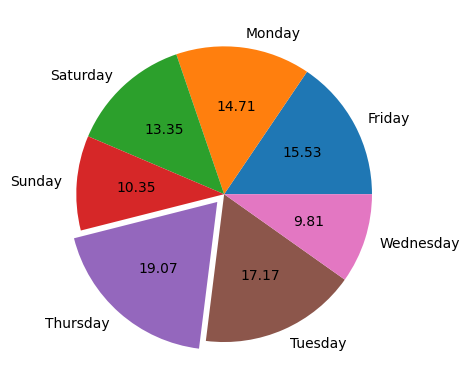

In [111]:
plt.pie(df3['weekday'], labels=df3['day_name'], autopct='%.2f', explode=[c/1000 if c == max(df3['weekday']) else 0 for c in df3['weekday']])
plt.show()

**Answer 3 - Thursday has the highest number of bookings.**

```
4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR
```

In [112]:
s3 = df.groupby(df['service_name'], as_index=False)['booking_id'].count()
df4 = pd.DataFrame(s3)
df4

,service_name,booking_id
0,GOIBIBO,202
1,MMT,53
2,YATRA,112


In [113]:
pd.pivot_table(df, ['INR_Amount'], ['service_name'],aggfunc={np.sum})

,INR_Amount
,sum
service_name,
GOIBIBO,6535751.17
MMT,688445.65
YATRA,3742584.21


**Answer 4**

**GOIBIBO - 202 Bookings - Gross Value 6535751.17 Rs**

**MMT - 53 Bookings - Gross Value - 688445.65 Rs**

**YATRA - 112 Bookings - Gross Value - 3742584.21 Rs**

```
5. For customers who have more than 1 booking, which is the most booked route(from_city to to_city)?
```

In [114]:
df5 = pd.pivot_table(df, ['customer_id'], ['from_city', 'to_city'],aggfunc=lambda x: len(x.unique()))
df5.head()

customer_id
from_city to_city                       
Agartala  Gurgaon                      1
Ahmedabad Chicalim                     1
          Frankfurt am Main            1
          Gurgaon                      3
          Gwalior                      1

In [115]:
df5[df5['customer_id'] == max(df5['customer_id'])]

,,customer_id
from_city,to_city,
Gurgaon,Frankfurt am Main,16


**Answer 5 - Gurgaon to Frankfurt - 16 Bookings**

```
6. Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?
```

In [116]:
df6 = pd.pivot_table(df, ['customer_id'], ['from_city'],aggfunc=lambda x: len(x.unique())).reset_index()
df6

,from_city,customer_id
0,Agartala,1
1,Ahmedabad,8
2,Angamāli,2
3,Bangalore,2
4,Barelā,1
5,Bhubaneswar,2
6,Bikaner,1
7,Bālāpur,5
8,Chennai,16
9,Chicalim,2


In [117]:
df6[df6['customer_id'] >= 5]

,from_city,customer_id
1,Ahmedabad,8
7,Bālāpur,5
8,Chennai,16
10,Delhi,29
11,Devanhalli,23
16,Gurgaon,125
25,Madhyamgram,6
27,Mumbai,34
29,New Delhi,7
33,Rāja Sānsi,17


In [118]:
df7 = pd.merge(df6, df,on='from_city')

In [119]:
df8 = pd.pivot_table(df7, ['days_to_departure'], ['from_city'],aggfunc=np.max)

In [120]:
df8.sort_values(by='days_to_departure', ascending=False)[:3]

,days_to_departure
from_city,
Gurgaon,311.0
Devanhalli,226.0
Mumbai,218.0


**Answer 6: Gurgaon - 311, Devanhalli - 226, Mumbai - 218**

```
7. Plot a heatmap displaying correlations of the numerical column and report which pair
of numerical columns in the bookings dataset, have the maximum correlation?
```

In [121]:
import seaborn as sns
%matplotlib inline
df_corr = df.corr()
df_corr

<ipython-input-121-4da011fc5ce3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


,INR_Amount,no_of_passengers,days_to_departure,distance_km,weekday
INR_Amount,1.000000,0.401168,0.288323,0.632731,0.068845
no_of_passengers,0.401168,1.000000,0.177522,0.019185,0.032517
days_to_departure,0.288323,0.177522,1.000000,0.208722,-0.009310
distance_km,0.632731,0.019185,0.208722,1.000000,0.069681
weekday,0.068845,0.032517,-0.009310,0.069681,1.000000


<Axes: >

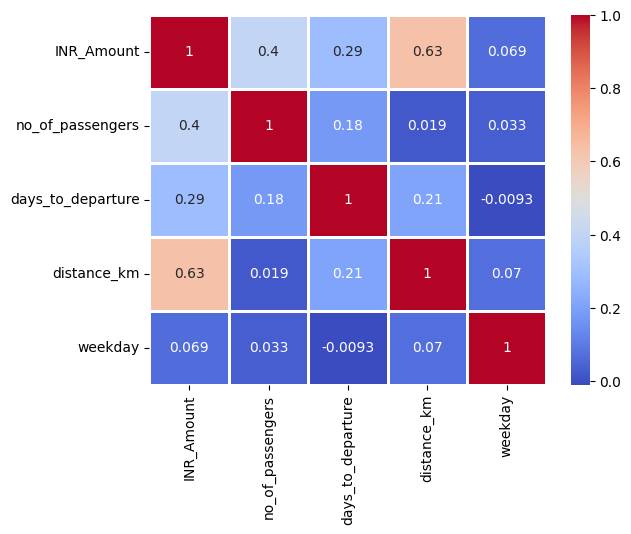

In [122]:
sns.heatmap(df_corr, annot=True,cmap='coolwarm',linecolor='white',linewidth=1)

**Answer 7: Amount and Distance has maximum correlation**

```
8. For each service, which is the most used device type for making bookings on the platform?
```

In [123]:
df9 = pd.pivot_table(df, ['customer_id'], ['service_name', 'device_type_used'],aggfunc=lambda x: len(x.unique()))
df9

customer_id
service_name device_type_used             
GOIBIBO      Android                    40
             Desktop                    57
             IOS                        62
             MobileWeb                  11
MMT          Android                     6
             Desktop                    28
             IOS                         5
             MobileWeb                   5
YATRA        Android                    18
             Desktop                    51
             IOS                        21
             MobileWeb                  11
             Tablet                      3

**Answer 8 - GOIBIBO - IOS - 62, MMT - Desktop - 28, YATRA - Desktop - 51**

```
9. Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year
and quarter showing the number of bookings performed by each device type
```

In [124]:
df['year'] = df['date'].dt.year
df['quarter'] = df['date'].dt.quarter
df.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,...,distance_km,session_id,search_id,search_time,session_starting_time,date,weekday,day_name,year,quarter
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,...,747.8,session_231,search_439,2020-02-05T16:10:42.982Z,2020-02-05T16:00:20.320Z,2020-02-05 16:12:08+00:00,2,Wednesday,2020,1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,...,6701.5,session_146,search_1304,2018-11-21T08:15:39.448Z,2018-11-21T07:30:07Z,2018-11-21 08:21:47+00:00,2,Wednesday,2018,4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,...,7712.0,session_202,search_186,2019-12-16T22:51:29.184Z,2019-12-16T22:45:33Z,2019-12-16 22:54:58+00:00,0,Monday,2019,4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,...,6112.5,session_239,search_539,2021-10-29T12:12:15Z,2021-10-29T10:52:23.691Z,2021-10-29 12:25:38+00:00,4,Friday,2021,4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,...,6570.4,session_312,search_546,2020-08-11T16:02:32Z,2020-08-11T16:02:20Z,2020-08-11 16:09:10+00:00,1,Tuesday,2020,3


In [125]:
df10 = pd.pivot_table(df, ['booking_id'], ['year', 'device_type_used'],aggfunc=lambda x: len(x.unique()))
df10

booking_id
year device_type_used            
2018 Android                    6
     Desktop                   28
     IOS                        4
     MobileWeb                  6
     Tablet                     2
2019 Android                   17
     Desktop                   24
     IOS                       18
     Tablet                     1
2020 Android                   30
     Desktop                   41
     IOS                       31
     MobileWeb                 11
2021 Android                   13
     Desktop                   37
     IOS                       27
     MobileWeb                  7
2022 Android                    4
     Desktop                   12
     IOS                       17
     MobileWeb                  3

In [126]:
df11 = df.pivot_table(index='year', columns='device_type_used', values= 'booking_id',aggfunc=lambda x: len(x.unique())).reset_index()
df11

device_type_used,year,Android,Desktop,IOS,MobileWeb,Tablet
0,2018,6.0,28.0,4.0,6.0,2.0
1,2019,17.0,24.0,18.0,NaN,1.0
2,2020,30.0,41.0,31.0,11.0,NaN
3,2021,13.0,37.0,27.0,7.0,NaN
4,2022,4.0,12.0,17.0,3.0,NaN


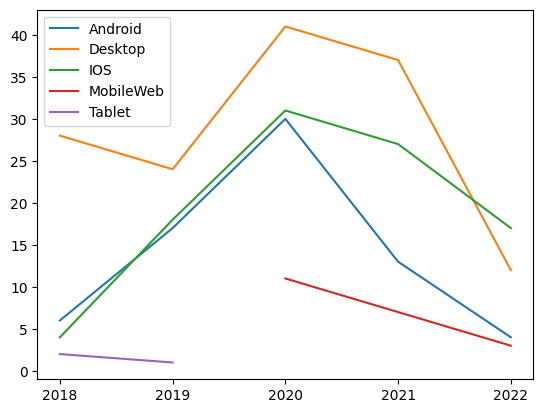

In [127]:
plt.plot(df11['year'], df11['Android'], label='Android')
plt.plot(df11['year'], df11['Desktop'], label='Desktop')
plt.plot(df11['year'], df11['IOS'], label='IOS')
plt.plot(df11['year'], df11['MobileWeb'], label='MobileWeb')
plt.plot(df11['year'], df11['Tablet'], label='Tablet')
plt.xticks(df11['year'])
plt.legend()
plt.show()

In [128]:
df12 = pd.pivot_table(df, ['booking_id'], ['quarter', 'device_type_used'],aggfunc=lambda x: len(x.unique()))
df12

booking_id
quarter device_type_used            
1       Android                   21
        Desktop                   49
        IOS                       40
        MobileWeb                 13
2       Android                    6
        Desktop                   13
        IOS                        9
        MobileWeb                  1
        Tablet                     1
3       Android                   14
        Desktop                   21
        IOS                       14
        MobileWeb                  4
        Tablet                     1
4       Android                   29
        Desktop                   59
        IOS                       34
        MobileWeb                  9
        Tablet                     1

In [129]:
df13 = df.pivot_table(index='quarter', columns='device_type_used', values= 'booking_id',aggfunc=lambda x: len(x.unique())).reset_index()
df13

device_type_used,quarter,Android,Desktop,IOS,MobileWeb,Tablet
0,1,21.0,49.0,40.0,13.0,NaN
1,2,6.0,13.0,9.0,1.0,1.0
2,3,14.0,21.0,14.0,4.0,1.0
3,4,29.0,59.0,34.0,9.0,1.0


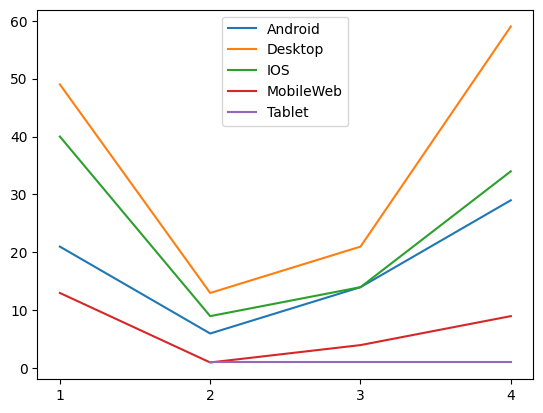

In [130]:
plt.plot(df13['quarter'], df13['Android'], label='Android')
plt.plot(df13['quarter'], df13['Desktop'], label='Desktop')
plt.plot(df13['quarter'], df13['IOS'], label='IOS')
plt.plot(df13['quarter'], df13['MobileWeb'], label='MobileWeb')
plt.plot(df13['quarter'], df13['Tablet'], label='Tablet')
plt.xticks(df13['quarter'])
plt.legend()
plt.show()